# Group 32 Final Project

* Group members:

We want to use headlines to predict stock trends. There is a problem that whether we should consider stock names.
If we use stock names, the dataset will be too small for prediction. To solve this problem, we may consider add stock names to the headlines.


### Preparation

Load libraries and dataset.

In [40]:
# Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Load data as Data Frame - unicode_escape
df = pd.read_csv("News Sentiment Analysis for Stock Data by Company.csv", encoding="latin-1")

## Quick View of the Data Set

Whether there is empty data in our data set.

In [3]:
df.head(10)

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
5,0,AAPL,Apple Inc and its main contract manufacturing ...
6,0,AAPL,European Union regulators who slapped Apple In...
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...


In [4]:
for column in df:
    print("The column", column, "has", df[column].isnull().sum(), "empty data.")

The column Label has 0 empty data.
The column Ticker has 0 empty data.
The column Headline has 0 empty data.


In [5]:
df['Ticker'].unique()

array(['A', 'AAPL', 'ACGL', 'ADBE', 'AAON', 'ALLT', 'AMED', 'AMGN',
       'ABCM', 'ANGN', 'APHA', 'ARAY', 'AVGO', 'BBBY', 'AAC=', 'CAN',
       'CELC', 'CEE', 'AEE', 'AAIC-C', 'COLL', 'AC', 'CTHR', 'CZNC',
       'EBAY', 'ECPG', 'EGLE', 'AAN', 'ERIC', 'ESLT', 'FBNC', 'AAA',
       'FITB', 'FIZZ', 'CFB', 'AA', 'GOOG', 'GRMN', 'HST', 'AAU', 'INPX',
       'JJSF', 'MAR', 'MPB', 'OZK', 'CENX', 'ACMR', 'PDLB', 'AAL', 'RUN',
       'SBLK', 'SNY', 'SSBI', 'ABB', 'TCX', 'TRMB', 'TSEM', 'TZOO', 'UAL',
       'ABEO', 'VEON', 'VOD', 'VRCA', 'ACND', 'XENE', 'ZNGA', 'ABNB',
       'ACCD', 'ACER', 'ACIW', 'ACST', 'ADI', 'ADSK', 'AFYA', 'AIRT',
       'AKAM', 'ALCO', 'ALGN', 'ALXN', 'AMAT', 'AMBA', 'AMCX', 'AMD',
       'AMZN', 'ANAT', 'ANGO', 'ANSS', 'AOUT', 'API', 'APPS', 'ARKO',
       'ARRY', 'ARVN', 'ASLN', 'ASUR', 'ATHX', 'AUDC', 'AVAV', 'AVO',
       'AWRE', 'AXGN', 'AXTA', 'AYTU', 'BAND', 'BEEM', 'AACG', 'BGCP',
       'BIDU', 'BIIB', 'BILI', 'BIOC', 'BKNG', 'BL', 'BLKB', 'BLUE',
       'BLU

In [6]:
df[df['Ticker']=='AAPL'].head(10)

,Label,Ticker,Headline
5,0,AAPL,Apple Inc and its main contract manufacturing ...
6,0,AAPL,European Union regulators who slapped Apple In...
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...
10,1,AAPL,The top U.N. human rights official warned on F...
11,1,AAPL,Google to form health company called Calico he...
12,0,AAPL,With tariffs looming Apple remains dependent o...
13,1,AAPL,Apple Inc said none of its operations were mov...
14,0,AAPL,U.S. authorities charged a former Apple Inc em...


## Quick Visualization

* 0 -> The stock went down by market close the day the article was published (negative)
* 1 -> The stock went up by market close the day the article was published (positive)
* 2 -> The stock stayed the same by market close the day the article was published (neutral)

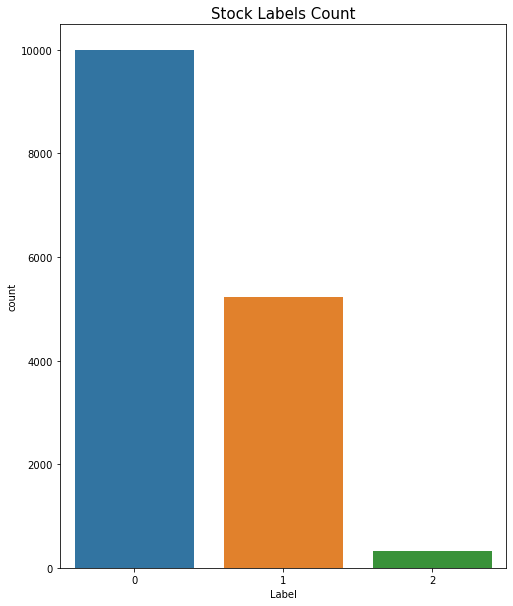

In [7]:
plt.figure(figsize=(8, 10))
sns.countplot(x=df['Label'])
plt.title("Stock Labels Count", fontsize=15)
plt.show()

## Preprocess Headlines

Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

Store the result in a list.

In [8]:
def clean_headline(headline):
    """
    Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

    Input:
        headline: A string of the headline.
    Output:
        tokens: a list of words containing the processed headline.

    """

    # remove links (use 'r' to represent raw strings)
    headline = re.sub(r'(https?://)?(www\.)?\S*\.\S*\s*', ' ', headline).strip()
    # remove punctuations using regular expression, and convert letters to lowercase
    headline = re.sub(r'[^\w\s]', '', headline).lower()
    # tokenization
    tokens = word_tokenize(headline)
    # remove stopwords
    sw = stopwords.words("english")
    tokens = [t for t in tokens if t not in sw]
    # stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]
    # lemmatization
    #wnl = nltk.WordNetLemmatizer()
    #tokens = [wnl.lemmatize(t) for t in tokens]

    return tokens

In [92]:
# Add cleaned headlines to data frame as strings.
for i in range(len(df)):
    tokens = clean_headline(df.loc[i, "Headline"])
    df.loc[i, 'Cleaned_Headline'] = df.loc[i, 'Ticker'] + ' ' + " ".join(tokens)

In [93]:
# Display part of the cleaned headlines
df.head(10)

,Label,Ticker,Headline,Cleaned_Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,A totestravel airlin share tumbl new york impo...
1,1,A,@TotesTravel : American United call off Hong K...,A totestravel american unit call hong kong fli...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,A totestravel airlin stock hit highest price s...
3,1,A,@TotesTravel : American Airlines reaches deal ...,A totestravel american airlin reach deal boe 7...
4,1,A,@TotesTravel : US airlines Treasury Department...,A totestravel us airlin treasuri depart reach ...
5,0,AAPL,Apple Inc and its main contract manufacturing ...,AAPL appl inc main contract manufactur foxconn...
6,0,AAPL,European Union regulators who slapped Apple In...,AAPL european union regul slap appl 13 billion...
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...,AAPL eu rule appl inc must pay huge tax bill i...
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...,AAPL russia want appl sap cooper foreign spi r...
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...,AAPL compani stash trillion oversea avoid micr...


## SVM

### Convert Word to Vector (TF-IDF)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:
np.random.seed(1453)

In [96]:
#Split the cleaned data into train and test sets
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['Cleaned_Headline'], df['Label'], test_size=0.3)

In [97]:
#Vectorize the data using TF-IDF
TfidfVectorizer = TfidfVectorizer(max_features=2000)
TfidfVectorizer.fit(df['Cleaned_Headline'])

TrainX_TFIDF = TfidfVectorizer.transform(Train_X)
TestX_TFIDF = TfidfVectorizer.transform(Test_X)

In [98]:
TfidfVectorizer.vocabulary_

{'totestravel': 1827,
 'airlin': 115,
 'share': 1625,
 'new': 1243,
 'york': 1990,
 'impos': 938,
 'case': 334,
 'american': 136,
 'group': 841,
 'plane': 1366,
 'prepar': 1405,
 'land': 1054,
 'airport': 116,
 'tuesday': 1859,
 'april': 168,
 'travelnewsinsight': 1841,
 'unit': 1879,
 'call': 310,
 'hong': 904,
 'kong': 1044,
 'flight': 749,
 'crew': 475,
 'test': 1798,
 'rule': 1562,
 'boe': 266,
 'aircraft': 114,
 'intern': 972,
 'stock': 1720,
 'hit': 897,
 'highest': 891,
 'price': 1413,
 'sinc': 1646,
 'june': 1028,
 'travel': 1840,
 'hope': 905,
 'next': 1246,
 'air': 112,
 'line': 1095,
 'reach': 1478,
 'deal': 512,
 '737': 42,
 'max': 1151,
 'ground': 840,
 '30': 31,
 'million': 1180,
 'employe': 633,
 'worker': 1973,
 'cover': 464,
 'engin': 639,
 'outsid': 1299,
 'us': 1888,
 'depart': 535,
 'agreement': 104,
 'aid': 109,
 'aapl': 53,
 'appl': 163,
 'inc': 940,
 'main': 1123,
 'contract': 443,
 'manufactur': 1131,
 'agre': 103,
 'tackl': 1771,
 'violat': 1907,
 'condit': 428

In [99]:
print(TrainX_TFIDF)

  (0, 1807)	0.35619364262859
  (0, 1768)	0.3266942880246339
  (0, 1623)	0.3353687812228491
  (0, 1244)	0.21713493602543932
  (0, 1142)	0.32360487102575547
  (0, 769)	0.25812587343834575
  (0, 454)	0.23244835543853554
  (0, 291)	0.2702475917095872
  (0, 265)	0.3214065409588452
  (0, 195)	0.24803630916854102
  (0, 91)	0.25632971907399155
  (0, 56)	0.2789855789873974
  (1, 1993)	0.3420667579286289
  (1, 1450)	0.3075185966785388
  (1, 1235)	0.3033633664903793
  (1, 563)	0.2899999547775173
  (1, 553)	0.29598164764111684
  (1, 426)	0.32349341207530236
  (1, 417)	0.20392039743194543
  (1, 368)	0.319378135327124
  (1, 139)	0.30451501871353337
  (1, 76)	0.3022381913905429
  (1, 60)	0.3039358053113938
  (2, 1904)	0.4450804381951283
  (2, 1867)	0.2973238758716135
  :	:
  (10889, 136)	0.26850285206954083
  (10889, 115)	0.3451509132846254
  (10889, 50)	0.17547511006709252
  (10889, 42)	0.3688622846685855
  (10889, 31)	0.17435163762129108
  (10890, 1636)	0.2797746855771047
  (10890, 1244)	0.23825339

### Training Model

In [73]:
# Fit the training dataset on the classifier, using linear kernel
svm_clf = svm.SVC(kernel='linear', degree=3)
svm_clf.fit(TrainX_TFIDF, Train_Y)

svm_predict = svm_clf.predict(TestX_TFIDF)

# Print the accuracy score
svm_acc = accuracy_score(svm_predict, Test_Y)
print(svm_acc)

0.6498179481687728


In [74]:
# Use Radial Basis Function kernel
rbf_clf = svm.SVC(kernel='rbf', gamma=2)
rbf_clf.fit(TrainX_TFIDF, Train_Y)

rbf_predict = rbf_clf.predict(TestX_TFIDF)

# Print accuracy
rbf_acc = accuracy_score(rbf_predict, Test_Y)
print(rbf_acc)

0.7213536089098308


### Test Case

In [128]:
# Tested Headline
# test_headline = "MMM Schoolgirl sells life story for $3M."
test_headline = "MMM 3M to cut 2000 jobs globally lowers 2019 profit outlook"
actual_cat = 0

# Convert to vector
word_vec = TfidfVectorizer.transform([" ".join(clean_headline(test_headline))])

# Make a prediction using SVM
pred = rbf_clf.predict(word_vec)

print("The SVM prediction is {}. The actual category is {}.".format(pred[0], actual_cat))

The SVM prediction is 0. The actual category is 0.


### Conclusion
After tuning the hyperparameters, the RBF kernel function gives a better prediction result of over 70% accuracy.

## LSTM

### Prepare data set

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.legacy import data
import random

In [17]:
# Set random seed
seed = 1453
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [18]:
# Set data field
HEADLINE = data.Field(tokenize='spacy', batch_first=True, include_lengths=True)
LABEL = data.LabelField(dtype=torch.long, batch_first=True)
fields = [(None, None), ('label', LABEL), ('headline', HEADLINE)]

In [19]:
# Transfer Data Field
data_for_DataFieldTransfer = df[['Label', 'Cleaned_Headline']]

data_for_DataFieldTransfer.to_csv("./data_for_DataFieldTransfer.csv", index=True)

training_data = data.TabularDataset(path='./data_for_DataFieldTransfer.csv', format='csv', fields=fields, skip_header=True)

In [20]:
# View new data form example
print(vars(training_data.examples[0]))

{'label': '0', 'headline': ['A', 'totestravel', 'airlin', 'share', 'tumbl', 'new', 'york', 'impos', 'quarantin', 'florida', 'case', 'spike', 'american', 'airlin', 'group', 'plane', 'prepar', 'land', 'laguardia', 'airport', 'lga', 'new', 'york', 'tuesday', 'april', 'travelnewsinsight']}


In [21]:
# Prepare training and testing data set
train_data, valid_data = training_data.split(split_ratio=0.7, random_state=random.seed(seed))

# X_train, X_test, y_train, y_test = train_test_split(training_data, df['Label'], test_size=0.2, random_state=20)

In [22]:
# the words should have at least a min frequency of 2 to build its vocab
MIN_FREQ = 2

# Torch text builds the vocabulary based on word representations from glove.
HEADLINE.build_vocab(train_data,
                     min_freq=MIN_FREQ,
                     vectors="glove.6B.100d",
                     unk_init=torch.Tensor.normal_)

LABEL.build_vocab(valid_data)

#### Quick View

In [23]:
# Headline Vocabs
print("Size of HEADLINE vocabulary:", len(HEADLINE.vocab))

Size of HEADLINE vocabulary: 9127


In [24]:
# Label Vocabs
print("Size of LABEL vocabulary:", len(LABEL.vocab))

Size of LABEL vocabulary: 3


In [25]:
# Frequent words
print("Frequent words:", HEADLINE.vocab.freqs.most_common(10))

Frequent words: [('A', 696), ('say', 655), ('new', 622), ('first', 568), ('us', 547), ('world', 523), ('compani', 501), ('china', 500), ('bank', 442), ('news', 433)]


In [26]:
# Vocab
print("Vocabs:", HEADLINE.vocab.stoi)

Vocabs: defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x00000203E6C7AD60>>, {'<unk>': 0, '<pad>': 1, 'A': 2, 'say': 3, 'new': 4, 'first': 5, 'us': 6, 'world': 7, 'compani': 8, 'china': 9, 'bank': 10, 'news': 11, 'trump': 12, 'amp': 13, 'market': 14, 'million': 15, 'corpor': 16, 'govern': 17, 'year': 18, 'countri': 19, 'use': 20, 'power': 21, 'group': 22, 'make': 23, 'AAN': 24, 'system': 25, 'appl': 26, 'said': 27, 'global': 28, 'chines': 29, 'report': 30, 'time': 31, 'billion': 32, 'energi': 33, 'state': 34, 'one': 35, 'call': 36, 'inc': 37, 'ban': 38, 'peopl': 39, 'intern': 40, 'american': 41, 'game': 42, 'india': 43, 'oil': 44, 'uk': 45, 'korea': 46, 'australian': 47, 'googl': 48, 'popular': 49, 'discoveri': 50, 'plan': 51, 'facebook': 52, 'could': 53, 'nation': 54, 'servic': 55, 'nt': 56, 'secur': 57, 'court': 58, 'two': 59, 'vaccin': 60, 'presid': 61, 'CSF': 62, 'deal': 63, 'get': 64, 'russian': 65, 'unit': 66, 'home': 67, 'BPOP': 68, 'polic

### Build Bi-LSTM Model

In [27]:
# If cuda available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set Batch Size
BATCH_SIZE = 128

# Load Iterator
train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data),
    batch_size=BATCH_SIZE,
    sort_key=lambda x: len(x.headline),
    sort_within_batch=True,
    device=device)

In [28]:
class LSTMClassifier(nn.Module):
    def __init__(self,
                 vocab_size,
                 embedding_dim,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        # Initialize
        super().__init__()
        # Embedding
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # LSTM
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first=True)
        # Dense
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        # Act
        self.act = nn.Sigmoid()

    def forward(self, text, text_lengths):
        # text = [batch size,sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
        # Pack padded sequence
        text_lengths_clamped = text_lengths.clamp(min=1)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths_clamped, batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # hidden = [batch size, num layers * num directions,hid dim]
        # cell = [batch size, num layers * num directions,hid dim]
        # Concat forward and backward hidden states
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)
        # Act
        outputs = self.act(dense_outputs)
        return outputs

In [29]:
# Hyper-parameters
input_dim = len(HEADLINE.vocab)
embedding_dim = 100
hidden_dim = 32
output_dim = len(LABEL.vocab)
num_layers = 2
bidirectional = True
dropout = 0.2

# LSTM Model
model = LSTMClassifier(input_dim,
                       embedding_dim,
                       hidden_dim,
                       output_dim,
                       num_layers,
                       bidirectional=bidirectional,
                       dropout=dropout)

In [30]:
print(model)

LSTMClassifier(
  (embedding): Embedding(9127, 100)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=64, out_features=3, bias=True)
  (act): Sigmoid()
)


In [31]:
# Available training parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 972,287 trainable parameters


In [32]:
# initializing model weights for better convergence
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, std=0.1)


model.apply(init_weights)

# initializing model embeddings with glove word vectors
pretrained_embeddings = HEADLINE.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.7506,  0.4851,  0.2734,  ..., -0.5432, -1.2170, -0.9132],
        [ 0.6753, -1.2324,  1.5064,  ..., -0.8353, -0.6744, -0.3777],
        [ 0.9313,  0.6730, -1.6294,  ...,  1.3548, -0.1716,  0.4117],
        ...,
        [ 0.0192, -0.3650, -0.3805,  ..., -0.8940,  0.0651,  1.4082],
        [ 0.1367, -0.1832, -0.0628,  ...,  0.1960,  0.2462,  0.1169],
        [-0.1404,  0.5372,  0.4209,  ...,  1.7021,  0.1654,  0.5849]])

### Set Optimizer

In [33]:
# Optimizer
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()


# Define accuracy
def categorical_accuracy(preds, y):
    # get the index of the max probability
    max_preds = preds.argmax(dim=1, keepdim=True)
    # correct = (max_preds == y).__float__()
    correct = (max_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


# Convert to cuda if available
model = model.to(device)
criterion = criterion.to(device)

### Training Function

In [34]:
def train(model, iterator, optimizer, criterion):
    # Set model as train
    model.train()
    # Initialize each epoch
    epoch_loss = 0
    epoch_acc = 0
    for batch in iterator:
        # Reset optimizer with zero gradients for each iteration
        optimizer.zero_grad()
        # Convert to one dim tensor
        text, text_lengths = batch.headline
        predictions = model(text, text_lengths).squeeze()
        # Calculate loss
        loss = criterion(predictions, batch.label)
        # Calculate accuracy
        acc = categorical_accuracy(predictions, batch.label)
        # Calculate gradients
        loss.backward()
        # Update weights
        optimizer.step()
        # Calculate loss and acc
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

### Evaluating Function

In [35]:
def evaluate(model, iterator, criterion):
    # Stop dropout
    model.eval()
    # Initialize each epoch
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for batch in iterator:
            # Convert to one dim tensor
            text, text_lengths = batch.headline
            predictions = model(text, text_lengths).squeeze()
            # Calculate loss and acc
            loss = criterion(predictions, batch.label)
            acc = categorical_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

### Train Bi-LSTM Model

In [36]:
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch + 1:02}\n')
    # Training
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    # Evaluating
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    # Save Model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc:.2f}%')

Epoch: 01

	Train Loss: 0.920 | Train Acc: 81.50%
	 Val. Loss: 0.872 | Val. Acc: 80.65%
Epoch: 02

	Train Loss: 0.864 | Train Acc: 81.52%
	 Val. Loss: 0.860 | Val. Acc: 80.65%
Epoch: 03

	Train Loss: 0.844 | Train Acc: 81.52%
	 Val. Loss: 0.836 | Val. Acc: 80.65%
Epoch: 04

	Train Loss: 0.817 | Train Acc: 81.52%
	 Val. Loss: 0.830 | Val. Acc: 80.65%
Epoch: 05

	Train Loss: 0.798 | Train Acc: 81.51%
	 Val. Loss: 0.828 | Val. Acc: 80.65%


### Predicting Function

In [37]:
def predict(model, sentence):
    # Tokenize
    tokens = clean_headline(sentence)
    # Word to Vector
    vectors = [HEADLINE.vocab.stoi[t] for t in tokens]
    # Number of words, and convert it to tensor
    length_tensor = torch.LongTensor([len(vectors)])
    # Vector to Tensor, and reshape
    tensor = torch.LongTensor(vectors).to(device).unsqueeze(1).T
    # Predict
    prediction = model(tensor, length_tensor)
    return prediction

### Test Case

In [38]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [39]:
# Load weights
path = './saved_weights.pt'
model.load_state_dict(torch.load(path))
model.eval()

# Test Headline Case
test_headline = "MMM Trump wants 3M to stop supplying Canada with N95 respirators"

# Make a prediction
pred_tensor = predict(model, test_headline)
# print("Predicted tensor:", pred_tensor)

max_pred = pred_tensor.argmax(dim=1, keepdim=True)

if 0 == max_pred:
    print("Predicted category is 0. Which means the stock may go down in the future. (negative)")
elif 1 == max_pred:
    print("Predicted category is 1. Which means the stock may go up in the future. (positive)")
else:
    print("Predicted category is 2. Which means the stock may stay the same in the future. (neutral)")


Predicted category is 0. Which means the stock may go down in the future. (negative)
